In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from matplotlib.animation import FuncAnimation
from math import sin, cos, atan2, sqrt, pi

In [2]:
def wrap_to_pi(theta):
    return (theta + pi) % (2 * pi) - pi

In [3]:
class Robot(object):
    '''A differential drive robot living in the x, y, theta plane'''
    
    def __init__(self, init_pose=np.zeros(3)):
        self.pose = init_pose 
   
    def update_pose(self, v, w, dt=0.1):
        dx = dt * v * cos(self.pose[2])
        dy = dt * v * sin(self.pose[2])
        dtheta = dt * w
        self.pose += np.array([dx, dy, dtheta])

In [4]:
class RobotControl(object):
    k_alpha = 1
    k_beta = -1
    k_rho = 0.5
    
    def __init__(self, goal_pose):
        self.goal_pose = goal_pose
    
    def control_law(self, measured_pose):
        e = self.goal_pose - measured_pose
        dx, dy = e[0], e[1]
        theta = wrap_to_pi(measured_pose[2])

        rho = sqrt(dx**2 + dy**2)
        alpha = wrap_to_pi(-theta + atan2(dy, dx))
        beta = wrap_to_pi(-theta - alpha)

        v = self.k_rho * rho
        w = self.k_alpha * alpha + self.k_beta * beta
        
        if alpha < -pi / 2 or alpha > pi / 2:
            v, w = -v, -w
        
        return v, w

<IPython.core.display.Javascript object>


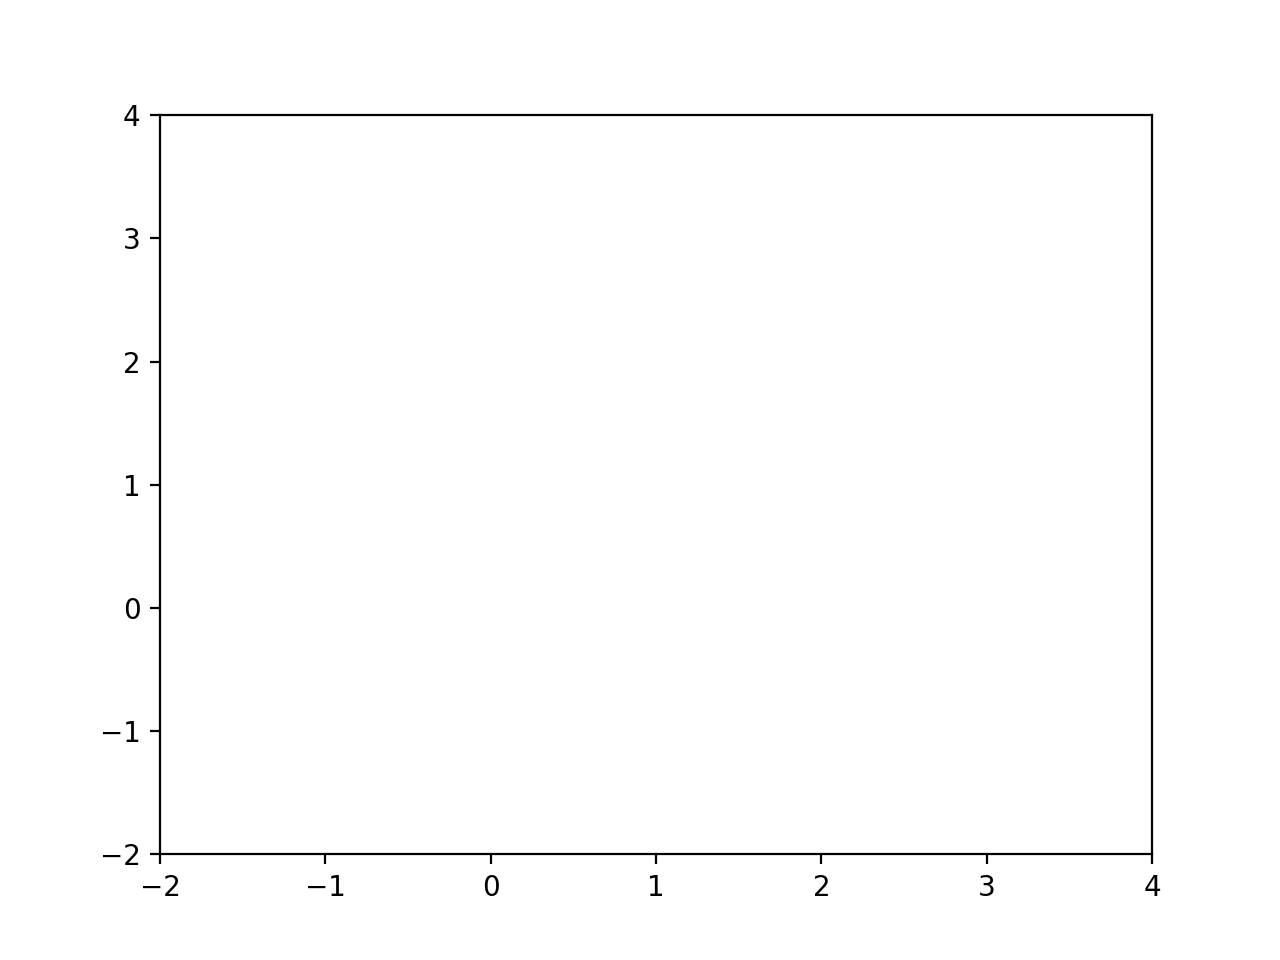

In [12]:
robot = Robot(init_pose=np.array(np.zeros(3)))
controller = RobotControl(goal_pose=np.array([2, 0, 0]))

f = plt.figure()
ax = plt.axes(xlim=(-2, 4), ylim=(-2, 4))
robot_plot, = ax.plot([], [], lw=2)
xdata, ydata = range(20), range(20)

def init():
    robot_plot.set_data([], [])
    return robot_plot,

def advance(i):
    global xdata, ydata
    measured_pose = robot.pose
    xdata += measured_pose[0]
    ydata += measured_pose[1]
    v, w = controller.control_law(measured_pose)
    robot.update_pose(v, w)
    robot_plot.set_data(xdata, ydata)
    return robot_plot,

ani = FuncAnimation(f, advance, init_func=init, frames=200, interval=500, blit=True)
plt.show()